In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import datetime

In [4]:
import pandas as pd
import numpy as np

In [5]:
from matplotlib import pyplot as plt

In [6]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA

In [7]:
cd C:\Users\hp\Download

C:\Users\hp\Download


In [8]:
2006-1996

10

In [9]:
dx = pd.DataFrame()
for i in range(11):
    df = pd.read_csv('ogora' + str(1996+i) + '_' + str(20220901) + '.txt', sep=",", header=None)
    df = df[df.columns[:8]]
    df.columns = ['LeaseNo', 'CompletionNo', 'Month', 'DaysOnProd', 'ProductCode', 'MonthlyOil', 'MonthlyGas', 'MonthlyWater']
    dx = pd.concat([dx, df], axis = 0)

In [10]:
2021-2006

15

In [11]:
dy = pd.DataFrame()
for i in range(15):
    df = pd.read_csv('ogora' + str(2007+i) + '_' + str(20220915) + '.txt', sep=",", header=None)
    df = df[df.columns[:8]]
    df.columns = ['LeaseNo', 'CompletionNo', 'Month', 'DaysOnProd', 'ProductCode', 'MonthlyOil', 'MonthlyGas', 'MonthlyWater']
    dy = pd.concat([dy, df], axis = 0)

In [12]:
dz = pd.concat([dx, dy], axis = 0)

In [13]:
dx['Month'].unique()

array([199601, 199602, 199603, 199604, 199605, 199606, 199607, 199608,
       199609, 199610, 199611, 199612, 199701, 199702, 199703, 199704,
       199705, 199706, 199707, 199708, 199709, 199710, 199711, 199712,
       199801, 199802, 199803, 199804, 199805, 199806, 199807, 199808,
       199809, 199810, 199811, 199812, 199901, 199902, 199903, 199904,
       199905, 199906, 199907, 199908, 199909, 199910, 199911, 199912,
       200001, 200002, 200003, 200004, 200005, 200006, 200007, 200008,
       200009, 200010, 200011, 200012, 200101, 200102, 200103, 200104,
       200105, 200106, 200107, 200108, 200109, 200110, 200111, 200112,
       200201, 200202, 200203, 200204, 200205, 200206, 200207, 200208,
       200209, 200210, 200211, 200212, 200301, 200302, 200303, 200304,
       200305, 200306, 200307, 200308, 200309, 200310, 200311, 200312,
       200401, 200402, 200403, 200404, 200405, 200406, 200407, 200408,
       200409, 200410, 200411, 200412, 200501, 200502, 200503, 200504,
      

In [14]:
dy['Month'].unique()

array([200701, 200702, 200703, 200704, 200705, 200706, 200707, 200708,
       200709, 200710, 200711, 200712, 200801, 200802, 200803, 200804,
       200805, 200806, 200807, 200808, 200809, 200810, 200811, 200812,
       200901, 200902, 200903, 200904, 200905, 200906, 200907, 200908,
       200909, 200910, 200911, 200912, 201001, 201002, 201003, 201004,
       201005, 201006, 201007, 201008, 201009, 201010, 201011, 201012,
       201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108,
       201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204,
       201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212,
       201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308,
       201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404,
       201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412,
       201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508,
       201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604,
      

In [15]:
dz['total'] = dz['MonthlyOil'] + dz['MonthlyGas'] + dz['MonthlyWater']

In [16]:
dz

,LeaseNo,CompletionNo,Month,DaysOnProd,ProductCode,MonthlyOil,MonthlyGas,MonthlyWater,total
0,00016,A004,199601,0.0,O,0,0,0,0
1,00016,A004D,199601,0.0,S,0,0,0,0
2,00016,A010,199601,31.0,O,3748,3286,480,7514
3,00016,E002,199601,0.0,O,0,0,0,0
4,00016,E002D,199601,29.0,O,2847,1423,183,4453
...,...,...,...,...,...,...,...,...,...
87679,S01367,015,202112,0.0,O,0,0,0,0
87680,S01423,111,202112,0.0,O,0,0,0,0
87681,S06894,B020C,202112,27.0,O,1363,0,1619,2982
87682,NaN,MB009,202112,31.0,O,152939,171328,7696,331963


In [17]:
d1 = pd.DataFrame()
d1['time'] = dz['Month']
d1['oil'] = dz['MonthlyOil']
d1 = d1[d1['oil']>0]

d11 = d1.groupby(['time'])['oil'].sum()
d11 = pd.DataFrame(d11)
d11.reset_index(inplace = True)

In [18]:
for i in d11['time'].index:
#     print(i)
#     print(str(d11.loc[i, 'time'])[-2:])
    b = str(d11.loc[i, 'time'])[-2:]
    a = str(d11.loc[i, 'time'])[:4]
    d11.loc[i, 'year'] = a
    d11.loc[i, 'month'] = b
    d11.loc[i, 'date'] = a + '-'+ b

In [19]:
d11['date'] = pd.to_datetime(d11['date'])
d11.set_index('date', inplace = True)

In [20]:
d2 = pd.DataFrame()
d2['time'] = dz['Month']
d2['gas'] = dz['MonthlyGas']
d2 = d2[d2['gas']>0]

d12 = d2.groupby(['time'])['gas'].sum()
d12 = pd.DataFrame(d12)
d12.reset_index(inplace = True)

In [21]:
for i in d12['time'].index:
#     print(i)
#     print(str(d11.loc[i, 'time'])[-2:])
    b = str(d12.loc[i, 'time'])[-2:]
    a = str(d12.loc[i, 'time'])[:4]
    d12.loc[i, 'year'] = a
    d12.loc[i, 'month'] = b
    d12.loc[i, 'date'] = a + '-'+ b
    
d12['date'] = pd.to_datetime(d12['date'])
d12.set_index('date', inplace = True)

In [22]:
d3 = pd.DataFrame()
d3['time'] = dz['Month']
d3['water'] = dz['MonthlyWater']
d3 = d3[d3['water']>0]

d13 = d3.groupby(['time'])['water'].sum()
d13 = pd.DataFrame(d13)
d13.reset_index(inplace = True)

In [23]:
for i in d13['time'].index:
#     print(i)
#     print(str(d11.loc[i, 'time'])[-2:])
    b = str(d13.loc[i, 'time'])[-2:]
    a = str(d13.loc[i, 'time'])[:4]
    d13.loc[i, 'year'] = a
    d13.loc[i, 'month'] = b
    d13.loc[i, 'date'] = a + '-'+ b
    
d13['date'] = pd.to_datetime(d13['date'])
d13.set_index('date', inplace = True)

In [24]:
d11

,time,oil,year,month
date,,,,
1996-01-01,199601,31013532,1996,01
1996-02-01,199602,29181267,1996,02
1996-03-01,199603,30863593,1996,03
1996-04-01,199604,29199505,1996,04
1996-05-01,199605,30917651,1996,05
...,...,...,...,...
2021-08-01,202108,48025189,2021,08
2021-09-01,202109,31815849,2021,09
2021-10-01,202110,52026243,2021,10


In [25]:
d12

,time,gas,year,month
date,,,,
1996-01-01,199601,433167463,1996,01
1996-02-01,199602,410173631,1996,02
1996-03-01,199603,436211501,1996,03
1996-04-01,199604,422576248,1996,04
1996-05-01,199605,442125039,1996,05
...,...,...,...,...
2021-08-01,202108,62445728,2021,08
2021-09-01,202109,35535284,2021,09
2021-10-01,202110,60984362,2021,10


In [26]:
d13

,time,water,year,month
date,,,,
1996-01-01,199601,49072044,1996,01
1996-02-01,199602,45024125,1996,02
1996-03-01,199603,48480278,1996,03
1996-04-01,199604,47266513,1996,04
1996-05-01,199605,49096526,1996,05
...,...,...,...,...
2021-08-01,202108,29982106,2021,08
2021-09-01,202109,15074500,2021,09
2021-10-01,202110,26057023,2021,10


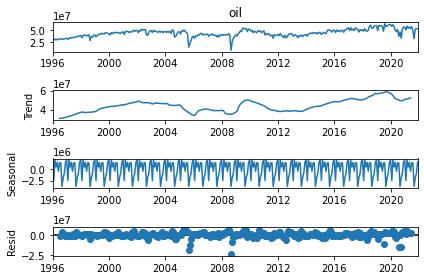

In [27]:
#decompose
ts_oil = d11['oil']
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(ts_oil)
decompose.plot();

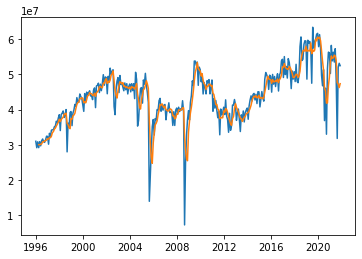

In [46]:
#rolling stats
#simple moving average
plt.plot(ts_oil)
plt.plot(ts_oil.rolling(window=4).mean())

In [29]:
#augmented dicky fuller

adfuller(ts_oil)

(-2.1537520347154833,
 0.22345666772867112,
 11,
 300,
 {'1%': -3.4523371197407404,
  '5%': -2.871222860740741,
  '10%': -2.571929211111111},
 9886.040207629718)

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [31]:
ts_oil

date
1996-01-01    31013532
1996-02-01    29181267
1996-03-01    30863593
1996-04-01    29199505
1996-05-01    30917651
                ...   
2021-08-01    48025189
2021-09-01    31815849
2021-10-01    52026243
2021-11-01    53164873
2021-12-01    52476335
Name: oil, Length: 312, dtype: int64

In [32]:
np.log(ts_oil)

date
1996-01-01    17.249934
1996-02-01    17.189038
1996-03-01    17.245088
1996-04-01    17.189662
1996-05-01    17.246838
                ...    
2021-08-01    17.687236
2021-09-01    17.275475
2021-10-01    17.767259
2021-11-01    17.788908
2021-12-01    17.775873
Name: oil, Length: 312, dtype: float64

In [33]:
log_diff_oil=np.log(ts_oil).diff(periods=1).dropna()
log_diff_oil2=np.log(ts_oil).diff(periods=2).dropna()

In [34]:
#augmented dicky fuller

adfuller(log_diff_oil)

(-8.602067447232344,
 6.826508880009845e-14,
 10,
 300,
 {'1%': -3.4523371197407404,
  '5%': -2.871222860740741,
  '10%': -2.571929211111111},
 -259.1504322050181)

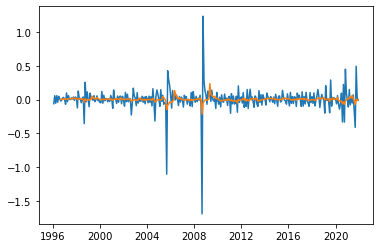

In [35]:
#rolling stats
#simple moving average
plt.plot(log_diff_oil)
plt.plot(log_diff_oil.rolling(window=8).mean())

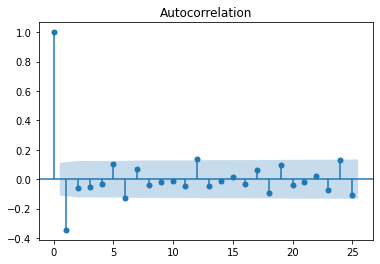

In [37]:
smt.graphics.plot_acf(log_diff_oil);

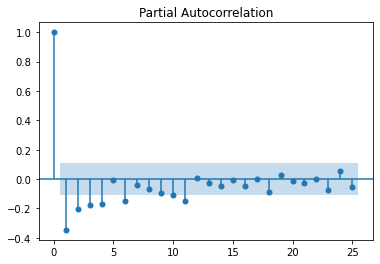

In [38]:
smt.graphics.plot_pacf(log_diff_oil);

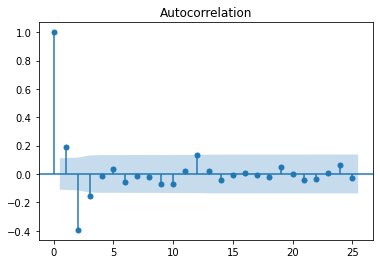

In [39]:
smt.graphics.plot_acf(log_diff_oil2);

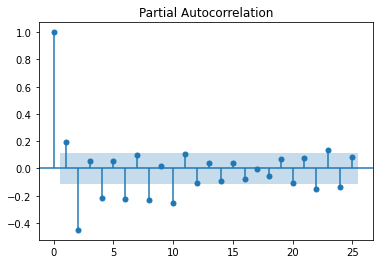

In [40]:
smt.graphics.plot_pacf(log_diff_oil2);

In [41]:
model = ARIMA(ts_oil, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                  D.oil   No. Observations:                  311
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5207.754
Method:                       css-mle   S.D. of innovations        4526149.584
Date:                Fri, 07 Oct 2022   AIC                          10423.509
Time:                        12:26:50   BIC                          10438.468
Sample:                    02-01-1996   HQIC                         10429.488
                         - 12-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.901e+04   7.29e+04      0.947      0.344   -7.39e+04    2.12e+05
ar.L1.D.oil     0.4051      0.094      4.295      0.000       0.220       0.590
ma.L1.D.oil    -0.8334      0.063    -13.282    

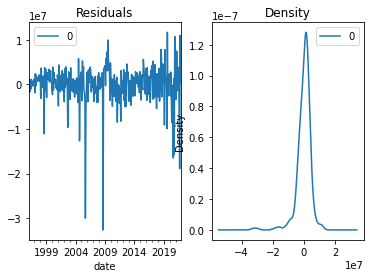

In [42]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<Figure size 1152x288 with 0 Axes>

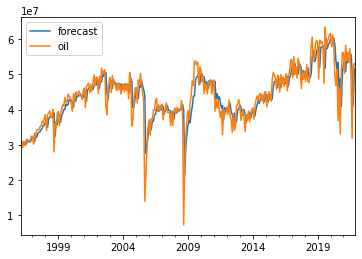

In [43]:
# Actual vs Fitted
plt.figure(figsize = (16, 4))
model_fit.plot_predict(dynamic=False)
plt.show()

In [44]:
ts_oil

date
1996-01-01    31013532
1996-02-01    29181267
1996-03-01    30863593
1996-04-01    29199505
1996-05-01    30917651
                ...   
2021-08-01    48025189
2021-09-01    31815849
2021-10-01    52026243
2021-11-01    53164873
2021-12-01    52476335
Name: oil, Length: 312, dtype: int64

In [47]:
#log_oil = np.log(ts_oil)

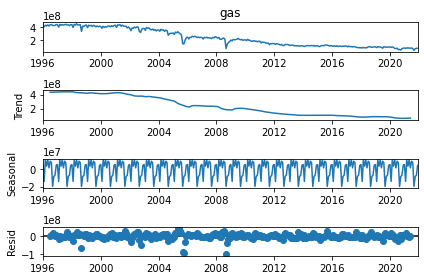

In [72]:
#decompose
ts_gas = d12['gas']
decompose=seasonal_decompose(ts_gas)
decompose.plot();

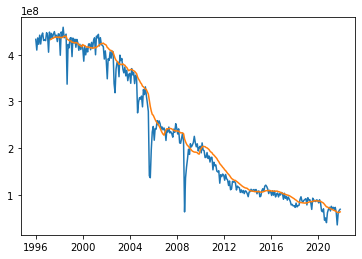

In [73]:
#rolling stats
#simple moving average
plt.plot(ts_gas)
plt.plot(ts_gas.rolling(window=16).mean())

In [74]:
#augmented dicky fuller

adfuller(ts_gas)

(-0.9541959789991771,
 0.7696017368060749,
 12,
 299,
 {'1%': -3.4524113009049935,
  '5%': -2.8712554127251764,
  '10%': -2.571946570731871},
 10717.009522438631)

In [75]:
log_diff_gas=np.log(ts_gas).diff(periods=1).dropna()
log_diff_gas2=np.log(ts_gas).diff(periods=2).dropna()

In [76]:
#augmented dicky fuller

adfuller(log_diff_gas)

(-8.867904212563506,
 1.423859715494399e-14,
 10,
 300,
 {'1%': -3.4523371197407404,
  '5%': -2.871222860740741,
  '10%': -2.571929211111111},
 -398.69959493552176)

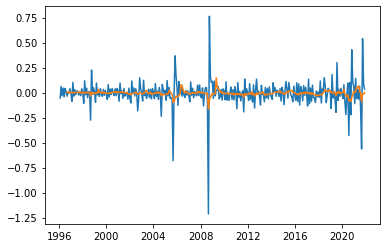

In [77]:
#rolling stats
#simple moving average

plt.plot(log_diff_gas)
plt.plot(log_diff_gas.rolling(window=8).mean())

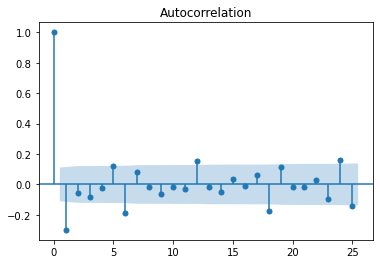

In [78]:
smt.graphics.plot_acf(log_diff_gas);

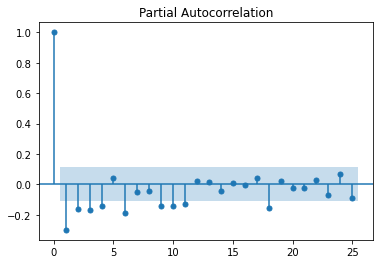

In [79]:
smt.graphics.plot_pacf(log_diff_gas);

In [80]:
model = ARIMA(ts_gas, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.gas   No. Observations:                  311
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5669.474
Method:                       css-mle   S.D. of innovations       19976418.610
Date:                Fri, 07 Oct 2022   AIC                          11346.947
Time:                        12:32:42   BIC                          11361.906
Sample:                    02-01-1996   HQIC                         11352.927
                         - 12-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.171e+06   3.35e+05     -3.493      0.000   -1.83e+06   -5.14e+05
ar.L1.D.gas     0.4268      0.082      5.192      0.000       0.266       0.588
ma.L1.D.gas    -0.8335      0.051    -16.324    

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


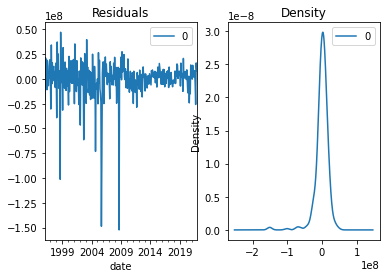

In [81]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<Figure size 1152x288 with 0 Axes>

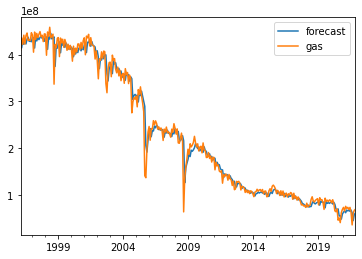

In [82]:
# Actual vs Fitted
plt.figure(figsize = (16, 4))
model_fit.plot_predict(dynamic=False)
plt.show()

In [83]:
ts_gas

date
1996-01-01    433167463
1996-02-01    410173631
1996-03-01    436211501
1996-04-01    422576248
1996-05-01    442125039
                ...    
2021-08-01     62445728
2021-09-01     35535284
2021-10-01     60984362
2021-11-01     66701708
2021-12-01     69102604
Name: gas, Length: 312, dtype: int64

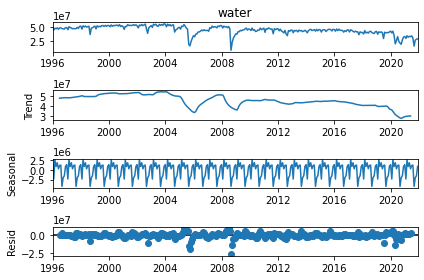

In [94]:
#decompose
ts_water= d13['water']
decompose=seasonal_decompose(ts_water)
decompose.plot();

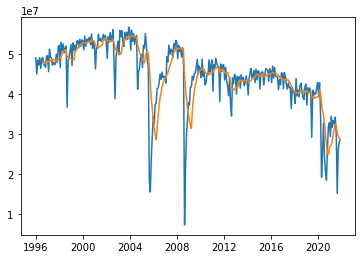

In [95]:
#rolling stats
#simple moving average
plt.plot(ts_water)
plt.plot(ts_water.rolling(window=8).mean())

In [96]:
#augmented dicky fuller

adfuller(ts_water)

(-1.6564501730367713,
 0.4536786775566888,
 12,
 299,
 {'1%': -3.4524113009049935,
  '5%': -2.8712554127251764,
  '10%': -2.571946570731871},
 9876.821384111854)

In [97]:
log_diff_water=np.log(ts_water).diff(periods=1).dropna()
log_diff_water2=np.log(ts_water).diff(periods=2).dropna()

In [98]:
#augmented dicky fuller

adfuller(log_diff_water)

(-8.26194660654465,
 5.05560123586019e-13,
 10,
 300,
 {'1%': -3.4523371197407404,
  '5%': -2.871222860740741,
  '10%': -2.571929211111111},
 -216.9533655088668)

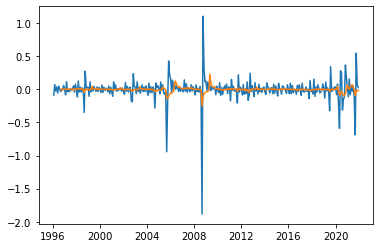

In [99]:
#rolling stats
#simple moving average
plt.plot(log_diff_water)
plt.plot(log_diff_water.rolling(window=8).mean())

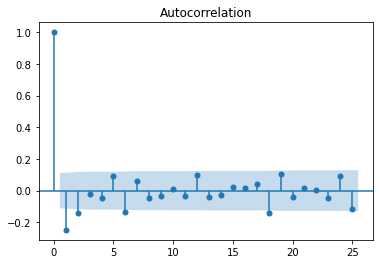

In [100]:
smt.graphics.plot_acf(log_diff_water);

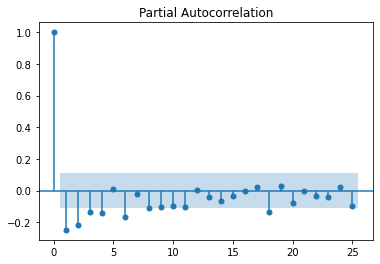

In [101]:
smt.graphics.plot_pacf(log_diff_water);

In [102]:
model = ARIMA(ts_water, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.water   No. Observations:                  311
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5203.755
Method:                       css-mle   S.D. of innovations        4466042.499
Date:                Fri, 07 Oct 2022   AIC                          10415.511
Time:                        12:34:18   BIC                          10430.470
Sample:                    02-01-1996   HQIC                         10421.490
                         - 12-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.579e+04   4.36e+04     -1.508      0.131   -1.51e+05    1.97e+04
ar.L1.D.water     0.6445      0.067      9.601      0.000       0.513       0.776
ma.L1.D.water    -0.9425      0.036    -

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


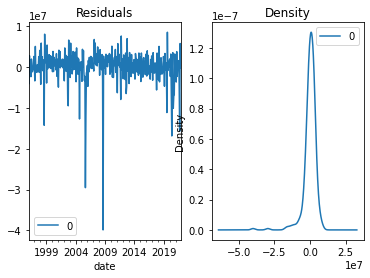

In [103]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

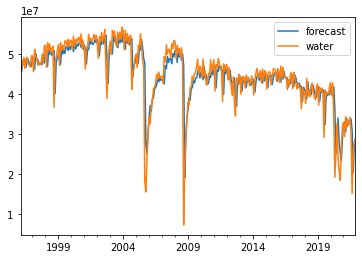

In [104]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False);

# Predicting on test dataset

In [69]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    return({'mape':mape})

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                  D.oil   No. Observations:                  259
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -4299.885
Method:                       css-mle   S.D. of innovations        3919019.837
Date:                Fri, 07 Oct 2022   AIC                           8617.771
Time:                        12:31:53   BIC                           8649.782
Sample:                    02-01-1996   HQIC                          8630.641
                         - 08-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.643e+04   7.98e+04      1.083      0.279      -7e+04    2.43e+05
ar.L1.D.oil    -0.1175      0.152     -0.775      0.438      -0.415       0.180
ar.L2.D.oil     0.4657      0.126      3.690    

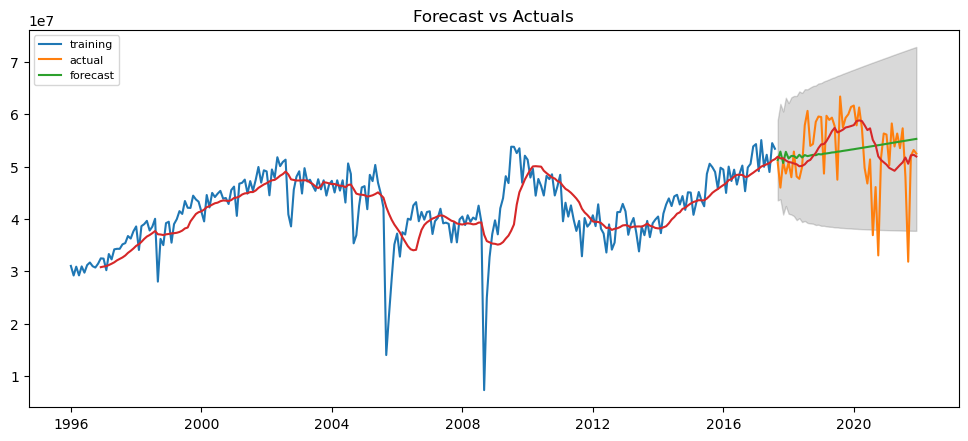

In [68]:
# Create Training and Test
train = ts_oil[:260]
test = ts_oil[260:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(5, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(52, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.plot(ts_oil.rolling(window=12).mean())
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
#plt.ylim(0, 2)
plt.show()


In [112]:
forecast_accuracy(fc, test.values)

{'mape': 0.2158268411866991}

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                  D.gas   No. Observations:                  259
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -4709.589
Method:                       css-mle   S.D. of innovations       18787421.122
Date:                Fri, 07 Oct 2022   AIC                           9439.179
Time:                        12:33:59   BIC                           9474.747
Sample:                    02-01-1996   HQIC                          9453.479
                         - 08-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.323e+06   3.81e+05     -3.476      0.001   -2.07e+06   -5.77e+05
ar.L1.D.gas    -1.2710      0.515     -2.466      0.014      -2.281      -0.261
ar.L2.D.gas    -0.2381      0.692     -0.344    

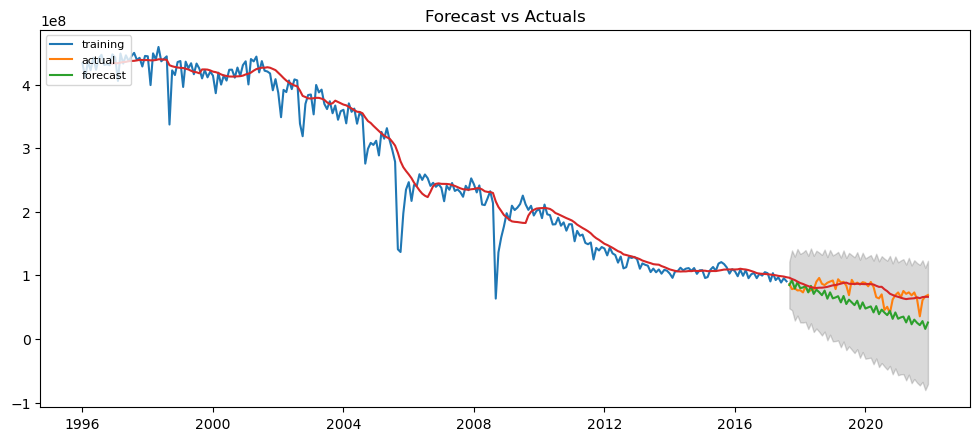

In [92]:
# Create Training and Test
train = ts_gas[:260]
test = ts_gas[260:]

# Build Model  
model = ARIMA(train, order=(4, 1, 4))  
fitted = model.fit(disp=-1)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(52, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.plot(ts_gas.rolling(window=12).mean())
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
#plt.ylim(10, 20)
plt.show()


In [70]:
forecast_accuracy(fc, test.values)

{'mape': 0.1114775624969587}

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:               D2.water   No. Observations:                  258
Model:                 ARIMA(4, 2, 2)   Log Likelihood               -4310.544
Method:                       css-mle   S.D. of innovations        4303762.613
Date:                Fri, 07 Oct 2022   AIC                           8637.088
Time:                        12:34:49   BIC                           8665.511
Sample:                    03-01-1996   HQIC                          8648.517
                         - 08-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -272.0991   2276.931     -0.120      0.905   -4734.801    4190.603
ar.L1.D2.water    -0.9467      0.088    -10.698      0.000      -1.120      -0.773
ar.L2.D2.water    -0.3391      0.085

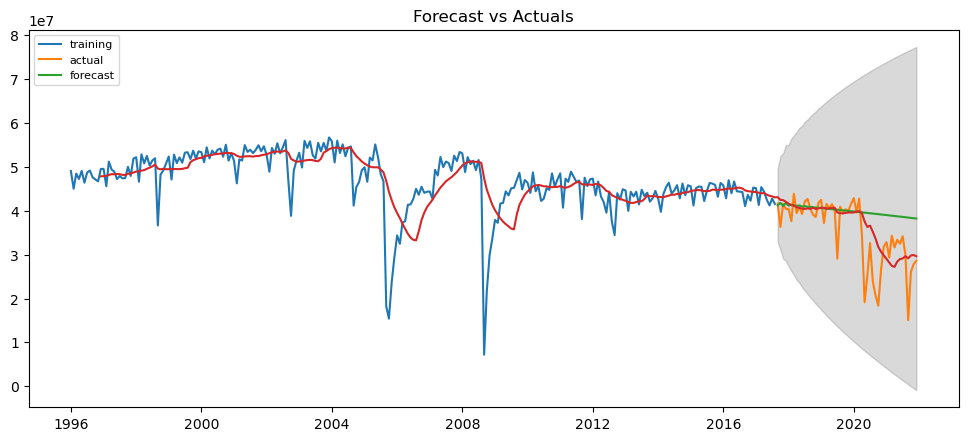

In [111]:
# Create Training and Test
train = ts_water[:260]
test = ts_water[260:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(4, 2, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(52, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.plot(ts_water.rolling(window=12).mean())
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
#plt.ylim(10, 20)
plt.show()


In [93]:
forecast_accuracy(fc, test.values)

{'mape': 0.3173281139659233}